Extract "102flowers.tgz" to the "102flowers_extracted" folder inside the "102flowers_data_extracted" folder

In [1]:
import tarfile
import os

tgz_path = "../102flowers_data/102flowers.tgz"
extract_folder = "../102flowers_data/102flowers_extracted"

# create the folder if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# extract .tgz file
with tarfile.open(tgz_path, "r:gz") as tar:
    tar.extractall(path=extract_folder)

print(f"Extracted {tgz_path} to {extract_folder}")

# both `102flowers_data/102flowers.tgz` and `102flowers_data/jpg/` should be in .gitignore so large files do not get pushed up to remote

Extracted ../102flowers_data/102flowers.tgz to ../102flowers_data/102flowers_extracted


Add "102flowers_extracted" to .gitignore

In [2]:
gitignore_path = "../.gitignore"
ignore_entry = "102flowers_data/102flowers_extracted/\n"

# read and check existing .gitignore content
with open(gitignore_path, "r") as f:
    lines = f.readlines()

# add entry if it's not already in the file
if ignore_entry not in lines:
    with open(gitignore_path, "a") as f:
        f.write(ignore_entry)
    print("Added '102flowers_data/102flowers_extracted/' to .gitignore")
else:
    print("Entry already exists in .gitignore")

Entry already exists in .gitignore


In [14]:
import os
from PIL import Image
import numpy as np

# path to the folder where the images were extracted
image_folder = "../102flowers_data/102flowers_extracted/jpg"  # update if needed

# get all image filenames
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(".jpg")]

# initialize lists to store dimensions
widths = []
heights = []
total_pixels = []

# loop through images
for filename in image_files:
    img_path = os.path.join(image_folder, filename)
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
            total_pixels.append(width * height)
    except Exception as e:
        print(f"Could not process {filename}: {e}")

# compute averages
avg_width = np.mean(widths)
avg_height = np.mean(heights)
avg_pixels = np.mean(total_pixels)

print(f"Number of images: {len(image_files)}")
print(f"Average width: {avg_width:.2f} pixels")
print(f"Average height: {avg_height:.2f} pixels")
print(f"Average total pixels per image: {avg_pixels:.2f}")

Number of images: 8189
Average width: 630.16 pixels
Average height: 534.35 pixels
Average total pixels per image: 332276.18


Load and examine "imagelabels.mat"

In [ ]:
from scipy.io import loadmat
import numpy as np

# load the .mat file
mat_path = "../102flowers_data/imagelabels.mat"
data = loadmat(mat_path)

# check keys
print("Keys in .mat file:", data.keys())

# access image labels
if 'labels' in data:
    labels = data['labels']
else:
    labels = None
    print("Label key not found.")

# inspect labels
if labels is not None:
    labels = np.squeeze(labels)
    print(f"Total labels: {len(labels)}")
    print(f"Label sample (first 20): {labels[:20]}")
    print(f"Unique categories: {len(np.unique(labels))}")

    # count images per category
    unique_labels, counts = np.unique(labels, return_counts=True)
    print("\nImages per category:")
    for label, count in zip(unique_labels, counts):
        print(f"Category {label}: {count} images")

Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'labels'])
Total labels: 8189
Label sample (first 20): [77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77 77]
Unique categories: 102

Images per category:
Category 1: 40 images
Category 2: 60 images
Category 3: 40 images
Category 4: 56 images
Category 5: 65 images
Category 6: 45 images
Category 7: 40 images
Category 8: 85 images
Category 9: 46 images
Category 10: 45 images
Category 11: 87 images
Category 12: 87 images
Category 13: 49 images
Category 14: 48 images
Category 15: 49 images
Category 16: 41 images
Category 17: 85 images
Category 18: 82 images
Category 19: 49 images
Category 20: 56 images
Category 21: 40 images
Category 22: 59 images
Category 23: 91 images
Category 24: 42 images
Category 25: 41 images
Category 26: 41 images
Category 27: 40 images
Category 28: 66 images
Category 29: 78 images
Category 30: 85 images
Category 31: 52 images
Category 32: 45 images
Category 33: 46 images
Category 34: 4

In [ ]:
# count images per category
unique_labels, counts = np.unique(labels, return_counts=True)

# information from https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/datasets/oxford_flowers102
# flower category names (indexed by label - 1)
category_names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon", "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower", "giant white arum lily", "fire lily", "pincushion flower",
    "fritillary", "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers", "stemless gentian", "artichoke", 
    "sweet william", "carnation", "garden phlox", "love in the mist", "mexican aster", "alpine sea holly", "ruby-lipped cattleya",
    "cape flower", "great masterwort", "siam tulip", "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia", 
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy", "common dandelion", "petunia", "wild pansy", "primula", 
    "sunflower", "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia", "pink-yellow dahlia", "cautleya spicata", 
    "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", "osteospermum", "spring crocus", "bearded iris", 
    "windflower", "tree poppy", "gazania", "azalea", "water lily", "rose", "thorn apple", "morning glory", "passion flower", "lotus", 
    "toad lily", "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow", "magnolia", "cyclamen", 
    "watercress", "canna lily", "hippeastrum", "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow", 
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper", "blackberry lily"
]

print("\nImages per flower category:")
for label, count in zip(unique_labels, counts):
    name = category_names[label - 1] if 1 <= label <= len(category_names) else "Unknown"
    print(f"{label:03d} - {name}: {count} images")


Images per flower category:
001 - pink primrose: 40 images
002 - hard-leaved pocket orchid: 60 images
003 - canterbury bells: 40 images
004 - sweet pea: 56 images
005 - english marigold: 65 images
006 - tiger lily: 45 images
007 - moon orchid: 40 images
008 - bird of paradise: 85 images
009 - monkshood: 46 images
010 - globe thistle: 45 images
011 - snapdragon: 87 images
012 - colt's foot: 87 images
013 - king protea: 49 images
014 - spear thistle: 48 images
015 - yellow iris: 49 images
016 - globe-flower: 41 images
017 - purple coneflower: 85 images
018 - peruvian lily: 82 images
019 - balloon flower: 49 images
020 - giant white arum lily: 56 images
021 - fire lily: 40 images
022 - pincushion flower: 59 images
023 - fritillary: 91 images
024 - red ginger: 42 images
025 - grape hyacinth: 41 images
026 - corn poppy: 41 images
027 - prince of wales feathers: 40 images
028 - stemless gentian: 66 images
029 - artichoke: 78 images
030 - sweet william: 85 images
031 - carnation: 52 images
0

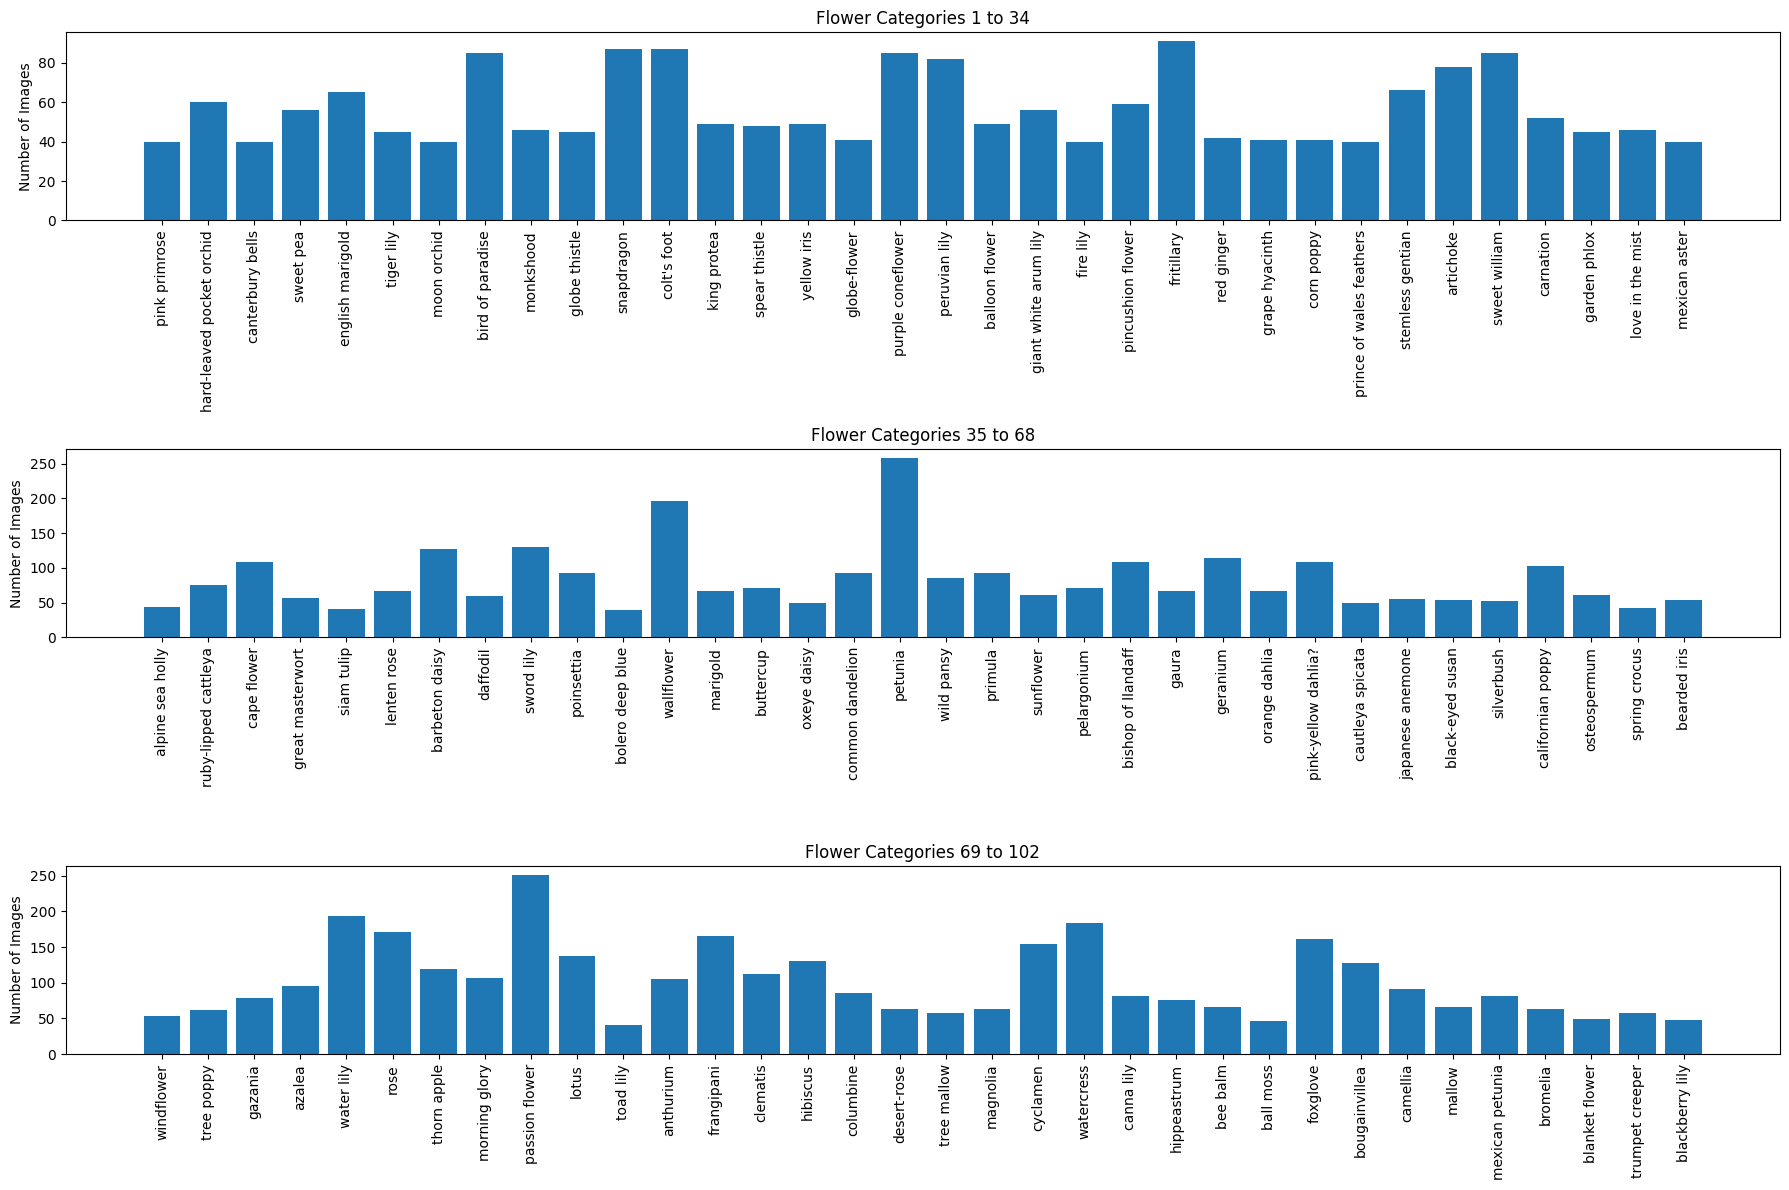

In [11]:
import matplotlib.pyplot as plt

# create list of category labels and image counts sorted by label
sorted_counts = [0] * 102
for label, count in zip(unique_labels, counts):
    sorted_counts[label - 1] = count

# plotting
num_categories = len(category_names)
categories_per_plot = 34
num_plots = 3

plt.figure(figsize=(18, 12))
for i in range(num_plots):
    start = i * categories_per_plot
    end = start + categories_per_plot
    x = category_names[start:end]
    y = sorted_counts[start:end]

    plt.subplot(3, 1, i + 1)
    plt.bar(range(categories_per_plot), y, tick_label=x)
    plt.xticks(rotation=90)
    plt.ylabel("Number of Images")
    plt.title(f"Flower Categories {start + 1} to {end}")

plt.tight_layout()
plt.show()

Images per flower category:
001 - pink primrose: Oenothera speciosa
002 - hard-leaved pocket orchid: Paphiopedilum micranthum
003 - canterbury bells: Campanula medium
004 - sweet pea: Lathyrus odoratus
005 - english marigold: Calendula officinalis
006 - tiger lily: Lilium lancifolium
007 - moon orchid: Phalaenopsis amabilis
008 - bird of paradise: Strelitzia reginae
009 - monkshood: Aconitum
010 - globe thistle: Echinops
011 - snapdragon: 87 images
012 - colt's foot: 87 images
013 - king protea: 49 images
014 - spear thistle: 48 images
015 - yellow iris: 49 images
016 - globe-flower: 41 images
017 - purple coneflower: 85 images
018 - peruvian lily: 82 images
019 - balloon flower: 49 images
020 - giant white arum lily: 56 images
021 - fire lily: 40 images
022 - pincushion flower: 59 images
023 - fritillary: 91 images
024 - red ginger: 42 images
025 - grape hyacinth: 41 images
026 - corn poppy: 41 images
027 - prince of wales feathers: 40 images
028 - stemless gentian: 66 images
029 - artichoke: 78 images
030 - sweet william: 85 images
031 - carnation: 52 images
032 - garden phlox: 45 images
033 - love in the mist: 46 images
034 - mexican aster: 40 images
035 - alpine sea holly: 43 images
036 - ruby-lipped cattleya: 75 images
037 - cape flower: 108 images
038 - great masterwort: 56 images
039 - siam tulip: 41 images
040 - lenten rose: 67 images
041 - barbeton daisy: 127 images
042 - daffodil: 59 images
043 - sword lily: 130 images
044 - poinsettia: 93 images
045 - bolero deep blue: 40 images
046 - wallflower: 196 images
047 - marigold: 67 images
048 - buttercup: 71 images
049 - oxeye daisy: 49 images
050 - common dandelion: 92 images
051 - petunia: 258 images

052 - wild pansy: Viola tricolor
053 - primula: Primula
054 - sunflower: Helianthus annuus
055 - pelargonium: Pelargonium X hortorum
056 - bishop of llandaff: Dahlia
057 - gaura: Gaura
058 - geranium: Pelargonium
059 - orange dahlia: Dahlia x hybrida
060 - pink-yellow dahlia: Dahlia hybrida
061 - cautleya spicata: Cautleya spicata
062 - japanese anemone: Anemone hupehensis
063 - black-eyed susan: Rudbeckia hirta
064 - silverbush: Convolvulus cneorum
065 - californian poppy: Eschscholzia californica
066 - osteospermum: Osteospermum
067 - spring crocus: Crocus vernus
068 - bearded iris: Iris germanica
069 - windflower: Anemone coronaria
070 - tree poppy: Dendromecon rigida
071 - gazania: Gazania rigens
072 - azalea: Rhododendron
073 - water lily: Nymhpaea odorata   
074 - rose: Rosa
075 - thorn apple: Datura stramonium
076 - morning glory: Ipomoea purpurea
077 - passion flower: Passiflora
078 - lotus: Nelumbo nucifera
079 - toad lily: Tricyrtis hirta
080 - anthurium: Anthurium
081 - frangipani: Plumeria rubra
082 - clematis: Clematis
083 - hibiscus: Hibiscus
084 - columbine: Aquilegia
085 - desert-rose: Adenium obesum
086 - tree mallow: Malva arborea
087 - magnolia: Magnolia
088 - cyclamen: Cyclamen
089 - watercress: Nasturtium officinale
090 - canna lily: Canna
091 - hippeastrum: Hippeastrum
092 - bee balm: Monarda
093 - ball moss: Tillandsia recurvata
094 - foxglove: Digitalis purpurea
095 - bougainvillea: Bougainvillea
096 - camellia: Camellia
097 - mallow: Malva
098 - mexican petunia: Ruellia angustifolia
099 - bromelia: Bromelia
100 - blanket flower: Gaillardia
101 - trumpet creeper: Campsis radicans
102 - blackberry lily: Iris domestica